<img SRC="CCCR.jpg"/>
<center><h1 Style="color:#5F9EA0">Analisis de Datos</h1></center>
<center><h3>Universidad Castro Carazo</h3></center>
<center><h3>Calentamiento Global Impacto Positivo de las Energías Renovables en Costa Rica datos analizados años 2010 y 2018</h3></center>
<center><h6>2C - 2022</h6></center>
</br>
</br>

<h2 Style="color:#8FBC8F">1. Carga y estandarizacion de lo set de datos</h2>

<p> Que se hace en esta etapa?</p>

<ol>
    <li>Importar librerias necesarias</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los encabezados de los DataFrames</li>
    <li> Si solo si tenemos mas de un set de datos - Unir lo set de datos en un unico DataFrame</li>
</ol>

<h3 Style="color:#5F9EA0">1.1 Importar Librerias</h3>

<p  Style="text-aling: justify">Este notebook contiene el análisis de los datos de las diferentes fuentes de generación de energía en Costa Rica por sector y tipo.
    
Como se puede impactar positivamente el Cmbio Cimatico basádonos en las diferentes energías producidas en Costa Rica?
    
Este análisis es con el fin de buscar cuales son las mejores alternativas actualmente y a futuro para tener un impacto positivo con respecto al cambio climatico estudiando los sectores estudiando, el consumo, fuentes de generacion, exportación, importación, etc. Los datos a continuacion son medidos en Terajulios o Terajules. </p>
</br>
</br>
<a href="http://sinamecc.opendata.junar.com/dashboards/20735/datos-relacionados-a-cambio-climatico/">Fuente de datos para el analisis</a>

In [1]:
import pandas as pd             #se va a usar para el manejo de DataFrame
import numpy as np              #se va a usar para el manejo de estructura de datos. (Listas, Tuplas, Diccionarios).
import matplotlib.pyplot as ptl  #se va a usar para el manejo de graficos.

In [2]:
cols = ["Descripción","CM","LE","RV(*)", "BG", "CC", "ORV", "PT", "HE", "GEO", "EOL", "BIG", "SOL", "Total", "CK", "CV", "LPG", "GR", "GS", "NFP", "AVG", "KE", "JF", "DO", "GO", "IF380", "FO", "EAS", "ASF", "OH", "EE", "Total"]
        
df_PB_energia = pd.read_excel("C:/Users/royer/Documents/PB2010.xlsx")

cols = ["Descripción","CM","LE","RV(*)", "BG", "CC", "ORV", "PT", "HE", "GEO", "EOL", "BIG", "SOL", "Total", "CK", "CV", "LPG", "GR", "GS", "NFP", "AVG", "KE", "JF", "DO", "GO", "IF380", "FO", "EAS", "ASF", "OH", "EE", "Total"]

df_PB_energia2 = pd.read_excel("C:/Users/royer/Documents/PB2018.xlsx")
        
cols =["Descripción", "2010", "2011", "2012", "2013","2014", "2015", "2016", "2017", "2018"]

df_PBNE_energia = pd.read_excel("C:/Users/royer/Documents/PBNE20102018.xlsx")

PB20102018ultimo = pd.read_excel("C:/Users/royer/Documents/PBNE20102018.xlsx")

#Simbología:CM =Carbón mineral / CC=Cascarilla de café / GEO = Geotermia / CK = Coke / GS= Gasolina súper / JF= Jet fuel / FO = Fuel oil / EE = Energía eléctrica / LE = Leña / ORV = Otros residus veget. / EOL = Energía Eólica / CV = Carbón vegetal / NFP=Nafta pesada / DO = Diesel / EAS = Emulsiones asfálticas / RV(*) = Residuos vegetales (ORV: Se refiere a cascarilla de arroz y residuos de la palma africana) / PT = Petróleo / BIG = biogás / LPG = Gas licuado / AVG = Av gas / GO = Gasóleo / ASF-30 = Asfaltos / BG = Bagazo / HE = Hidroenergía / SOL = Energía solar / GR = Gasolina regular / KE=Kerosene / IF380 =Ifo 380 / OH = Alcohol / EE = Energía eléctrica /  (*) 4 + 5 + 6



<h3 Style="color:#5F9EA0">1.2 Importar el Set de Datos</h3>

In [3]:
df_PB_energia.shape #Esto me permite conocer el tamaño del DataFrame

(112, 34)

In [4]:
df_PB_energia2.shape #Esto me permite conocer el tamaño del df_PBNE_energia

(112, 34)

In [5]:
df_PBNE_energia.shape # Mostrara las primeras 10 filas de df_PB_energia

(83, 10)

In [6]:
df_PB_energia.head(10) # Mostrara las primeras 10 filas de df_PB_energia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN
5,No aprovechada,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,10816.634522,11517.928786,...,0.000000,0,0,0.000000,0.000000,0,NaN,0.000000,22528.897062,NaN
6,Oferta Interna,29.88768,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,21482.392230,28114.140669,40999.001711,...,206.697009,865.816791,6091.043305,134.659213,1386.135476,122.629876,34604.147393,133831.111679,200728.880011,NaN
7,Total Transformado,0,-167.195186,-1043.180410,-936.077918,0,-107.102491,-21621.768300,-28114.140669,-40999.001711,...,0.000000,0,-1113.042127,0.000000,0.000000,0,0,-7212.855268,-44587.678282,Perdidas en trasnformación
8,Carboneras,NaN,-167.195186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.798797,-125.396390,NaN
9,Refinerias,NaN,NaN,NaN,NaN,NaN,NaN,-21621.768300,NaN,NaN,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,NaN,NaN,21322.013810,-299.754490,NaN


In [7]:
df_PB_energia2.head(10) # Mostrara las primeras 10 filas de df_PB_energia2

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,365.189153,0,-235.049019,342.262181,-342.262181,0,NaN,-15.935527,-15.935527,NaN
1,Producción,NaN,8645.801538,16143.605189,11266.810131,347.552078,4529.24298,NaN,39375.336425,42368.71647,...,0.000000,0,0,0.000000,0.000000,608.190974,41394.962928,42019.872128,113220.040303,NaN
2,Importación,13.873428,1.929432,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.000000,0,5117.355102,0.000000,4077.722908,0.315202,2059.818732,117505.296707,117521.099567,NaN
3,Exportación,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.000000,0,0,0.000000,0.000000,535.58303,2926.526076,3462.109106,3462.109106,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-391.206275,NaN,...,28.505482,0,1085.036777,-4.567625,73.995808,0,NaN,2909.772762,2518.566486,NaN
5,No aprovechada,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,6350.866059,11530.5867,...,0.000000,0,0,0.000000,0.000000,0,NaN,0.000000,17885.894859,NaN
6,Oferta Interna,13.873428,8647.730971,16143.605189,11266.810131,347.552078,4529.24298,0.0,32633.264091,30838.129771,...,393.694636,0,5967.34286,337.694556,3809.456535,72.923147,40528.255584,158956.896964,211895.766866,NaN
7,Total Transformado,0,-66.872902,-1314.854426,-1196.461752,0,-118.392674,0.0,-32633.264091,-30838.117116,...,0.000000,0,-1255.066924,0.000000,0.000000,0,0,-1389.249009,-31484.338615,Perdidas en transformación
8,Carboneras,NaN,-66.872902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.191882,-24.681021,NaN
9,Refinerias,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN


In [8]:
df_PBNE_energia.head(10) # Mostrara las primeras 10 filas de df_PBNE_energia

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"
3,Residencial,"23,382.00","22,139.00","21,586.00","21,366.00","20,603.00","20,791.00","20,620.00","20,652.00","19,481.00"
4,1. Urbano,"10,514.00","11,513.00","11,950.00","12,090.00","12,606.00","13,197.00","13,459.00","13,687.00","13,521.00"
5,1.a Cocción,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
6,1.b Enfriamiento,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
7,1.c Iluminación,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
8,1.d Producción de calor,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"
9,1.e Generación de fuerza,"2,076.00","2,078.00","2,154.00","2,264.00","2,463.00","2,588.00","2,916.00","2,943.00","3,138.00"


In [9]:
df_PB_energia.tail(10) # Mostrara las últimas 10 filas de df_PB_energia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
102,6.c Iluminación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
103,6.d Enfriamiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
104,6.e Generación de fuerza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
105,6.f Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
106,Agropecuario,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,6.73662,NaN,NaN,NaN,1121.947908,2854.011920,2854.011920,NaN
107,Consumo no identificado (otros),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,115.434,NaN,31.22988,NaN,NaN,NaN,230.982392,953.392022,953.392022,NaN
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,...,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN,NaN,NaN
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,...,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,...,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,BG,Bagazo,NaN,NaN,HE,Hidroenergía,NaN,NaN,SOL,...,NaN,OH,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_PB_energia2.tail(10) #Mostrara las últimas 10 filas del df_PB_energia2

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
102,6.c Iluminación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
103,6.d Enfriamiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
104,6.e Generación de fuerza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
105,6.f Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
106,Agropecuario,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,1177.697824,3336.640355,3336.640355,NaN
107,Consumo no identificado (otros),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,291.460033,NaN,0.737134,NaN,NaN,NaN,267.0904,1429.578796,1429.578796,NaN
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,...,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN,NaN,NaN
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,...,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,...,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,BG,Bagazo,NaN,NaN,HE,Hidroenergía,NaN,NaN,SOL,...,NaN,OH,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_PBNE_energia.tail(10) #Mostrara las últimas 10 filas del df_PBNE_energia

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
73,5.f Otros,-,-,-,-,0,0,0,0,0
74,6. Otras industrias (CIIU 36-39),"7,833.00","9,532.00","9,257.00","9,218.00","9,210.00","8,941.00","9,538.00","10,238.00","9,518.00"
75,6.a Generación de vapor,-,-,-,-,0,0,0,0,0
76,6.b Generación de calor,-,-,-,-,0,0,0,0,0
77,6.c Iluminación,-,-,-,-,0,0,0,0,0
78,6.d Enfriamiento,-,-,-,-,0,0,0,0,0
79,6.e Generación de fuerza,-,-,-,-,0,0,0,0,0
80,6.f Otros,-,-,-,-,0,0,0,0,0
81,Agropecuario,"2,854.00","3,092.00","3,242.00","3,273.00","3,254.00","3,327.00","3,584.00","3,761.00","3,337.00"
82,Consumo no identificado (otros),953,"1,106.00",955,"1,008.00","1,281.00","1,346.00","1,364.00","1,493.00","1,430.00"


<h3 Style="color:#5F9EA0">1.3 Revisar encabezados de los set de datos </h3>

In [12]:
df_PB_energia.info() #Revisaremos el tipo de dato del df_PB_energia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Descripción        108 non-null    object 
 1   CM                 20 non-null     object 
 2   LE                 30 non-null     object 
 3   RV(*)              22 non-null     float64
 4   BG                 16 non-null     float64
 5   CC                 19 non-null     object 
 6   ORV                21 non-null     object 
 7   PT                 9 non-null      float64
 8   HE                 10 non-null     float64
 9   GEO                13 non-null     object 
 10  EOL                12 non-null     object 
 11  BIG                9 non-null      float64
 12  SOL                6 non-null      float64
 13  Total primarias    111 non-null    object 
 14  CK                 19 non-null     object 
 15  CV                 17 non-null     float64
 16  LPG                94 non-

In [13]:
df_PB_energia.columns # Mostrar las columnas del df_PB_energia

Index(['Descripción', 'CM', 'LE', 'RV(*)', 'BG', 'CC', 'ORV', 'PT', 'HE',
       'GEO', 'EOL', 'BIG', 'SOL', 'Total primarias', 'CK', 'CV', 'LPG', 'GR',
       'GS', 'NFP', 'AVG', 'KE', 'JF', 'DO', 'GO', 'IF380', 'FO', 'EAS', 'ASF',
       'OH', 'EE', 'Total secundarias', 'Total', 'Unnamed: 33'],
      dtype='object')

In [14]:
df_PB_energia2.columns # Mostrar las columnas del df_PB_energia2

Index(['Descripción', 'CM', 'LE', 'RV(*)', 'BG', 'CC', 'ORV', 'PT', 'HE',
       'GEO', 'EOL', 'BIG', 'SOL', 'Total primarias', 'CK', 'CV', 'LPG', 'GR',
       'GS', 'NFP', 'AVG', 'KE', 'JF', 'DO', 'GO', 'IF380', 'FO', 'EAS', 'ASF',
       'OH', 'EE', 'Total secundarias', 'Total', 'Unnamed: 33'],
      dtype='object')

In [15]:
df_PBNE_energia.columns # Mostrar las columnas del df_PBNE_energia

Index(['Descripción', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='object')

<h3 Style="color:#5F9EA0">1.4 Unir Achivos en un solo DataFrame</h3>

In [16]:
unionArchivos = [df_PB_energia, df_PB_energia2] #Lista de DataFrame
dfenergia = pd.concat(unionArchivos)
dfenergia.shape

(224, 34)

In [17]:
dfenergia.head(10) #Mostrara las últimas 10 filas del dfenergia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN
5,No aprovechada,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,10816.634522,11517.928786,...,0.000000,0,0,0.000000,0.000000,0,NaN,0.000000,22528.897062,NaN
6,Oferta Interna,29.88768,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,21482.392230,28114.140669,40999.001711,...,206.697009,865.816791,6091.043305,134.659213,1386.135476,122.629876,34604.147393,133831.111679,200728.880011,NaN
7,Total Transformado,0,-167.195186,-1043.180410,-936.077918,0,-107.102491,-21621.768300,-28114.140669,-40999.001711,...,0.000000,0,-1113.042127,0.000000,0.000000,0,0,-7212.855268,-44587.678282,Perdidas en trasnformación
8,Carboneras,NaN,-167.195186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.798797,-125.396390,NaN
9,Refinerias,NaN,NaN,NaN,NaN,NaN,NaN,-21621.768300,NaN,NaN,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,NaN,NaN,21322.013810,-299.754490,NaN


In [18]:
dfenergia.tail(10) #Mostrara lasultimas 10 filas del dfenergia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
102,6.c Iluminación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
103,6.d Enfriamiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
104,6.e Generación de fuerza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
105,6.f Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
106,Agropecuario,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0,NaN,NaN,NaN,1177.697824,3336.640355,3336.640355,NaN
107,Consumo no identificado (otros),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,291.460033,NaN,0.737134,NaN,NaN,NaN,267.0904,1429.578796,1429.578796,NaN
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,...,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN,NaN,NaN
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,...,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,...,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,BG,Bagazo,NaN,NaN,HE,Hidroenergía,NaN,NaN,SOL,...,NaN,OH,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dftem = dfenergia.iloc[:, :] #Muestra todas las columnas de la informacion de datos con todas las filas

In [20]:
dftem

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.4,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Consumo no identificado (otros),NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,291.460033,NaN,0.737134,NaN,NaN,NaN,267.0904,1429.578796,1429.578796,NaN
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,...,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN,NaN,NaN
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,...,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,...,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dftemEP = dfenergia.iloc[:, 0:14] #Las 14 primeras columnas que corresponden a Energias primarias de la informacion de datos con todas las filas

In [22]:
dftemEP

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,EOL,BIG,SOL,Total primarias
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,NaN,NaN,NaN,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.4,375.26226,6060.444508,NaN,39349.639622,52516.930497,1291.23,260.622989,0.934851,124792.803785
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,NaN,NaN,NaN,21210.57468
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,NaN,NaN,NaN,-115.537599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Consumo no identificado (otros),NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,Geotermia,NaN,NaN,CK
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,Energía Eólica,NaN,NaN,CV
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,Biogás,NaN,NaN,LPG


In [23]:
dftemES = dfenergia.iloc[:, 15:32] #Las 17 últimas columnas que corresponden a Energias secundarias de la informacion de datos con todas las filas

In [24]:
dftemES

,CV,LPG,GR,GS,NFP,AVG,KE,JF,DO,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias
0,NaN,0.000000,-904.267152,1016.912264,12.546383,0.000000,-17.001707,-24.22138,-244.123362,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137
1,41.798797,207.435880,3920.390507,897.443493,0.000000,0.000000,102.41037,1721.81097,6180.365400,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471
2,NaN,5097.906183,16090.895917,11107.860083,0.000000,72.946514,0,5576.579955,39113.819149,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778
3,NaN,0.000000,0,0,0.000000,28.293184,0,0,2147.131642,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028
4,NaN,36.266340,821.881651,-91.897229,-1.177718,33.026781,70.524586,-190.305078,-729.777251,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,0.000000,0,0,NaN,0.000000,0,0,870.291229,291.460033,NaN,0.737134,NaN,NaN,NaN,267.0904,1429.578796
108,NaN,NaN,GS,Gasolina súper,NaN,NaN,JF,Jet fuel,NaN,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN
109,NaN,NaN,NFP,Nafta pesada,NaN,NaN,DO,Diesel,NaN,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,AVG,Av gas,NaN,NaN,GO,Gasóleo,NaN,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN


In [25]:
dftem = dfenergia.iloc[[0,1,22,55], [0, 3, 9]] # 1er, 3th, 22th, 55th filas mas 1st, 3th, 9th columnas

In [26]:
dftem

,Descripción,RV(*),GEO
0,Transferencias,NaN,NaN
1,Producción,17208.106768,52516.930497
22,Consumo propio,0.000000,NaN
55,3. Carga,NaN,NaN


In [27]:
df_PBNE_energia.iloc[:, [0, 1, 9]] #Aquí visualizamos el consumo total por sector de consumo para los años 2010 y 2018 que seran los datos comparados para el análisis.

,Descripción,2010,2018
0,Consumo final total,"152,180.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","5,592.00"
2,Consumo final (energético),"149,115.00","171,342.00"
3,Residencial,"23,382.00","19,481.00"
4,1. Urbano,"10,514.00","13,521.00"
...,...,...,...
78,6.d Enfriamiento,-,0
79,6.e Generación de fuerza,-,0
80,6.f Otros,-,0
81,Agropecuario,"2,854.00","3,337.00"


In [28]:
df_energia = dfenergia

In [29]:
dfenergia.shape

(224, 34)

<h2 Style="color:#8FBC8F">2 Manejo de Valores Faltantes o Perdidos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Identificar como se muestran los valores faltantes(null, espacio vacio, ?) y estandarizarlos (NaN)</li>
    <li>Contar la cantidad de valores NaN faltantes por variable (columna)</li>
    <li>Analisis de Imputacion (el promedio / ML) para el caso de los numericos</li>
    <li>Analisis de imputacion con el valor mas frecuente / ML) para el caso de los caracter</li>
    <li>Eliminan filas o columnas con valores faltantes</li>
<ol>
    
<h3 Style="color:#5F9EA0">2.1 Identificar como se muestran los valores faltantes y estandarizarlos</h3>

In [30]:
dfenergia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.4,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Consumo no identificado (otros),NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,291.460033,NaN,0.737134,NaN,NaN,NaN,267.0904,1429.578796,1429.578796,NaN
108,NaN,CM,Carbón mineral,NaN,NaN,CC,Cascarilla de café,NaN,NaN,GEO,...,NaN,FO,Fuel oil,NaN,NaN,EE,Energía eléctrica,NaN,NaN,NaN
109,NaN,LE,Leña,NaN,NaN,ORV,Otros residus veget.,NaN,NaN,EOL,...,NaN,EAS,Emulsiones asfálticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,RV(*),Residuos vegetales,NaN,NaN,PT,Petróleo,NaN,NaN,BIG,...,NaN,ASF-30,Asfaltos,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dfenergia.replace("?", np.nan, inplace = True)
dfenergia.head()

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,NaN,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.4,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,NaN,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN


In [32]:
dfenergia.shape

(224, 34)

<h3 Style="color:#5F9EA0">2.2 Contar Valores Faltantes por columna</h3>

In [33]:
valoresPerdidos = dfenergia.isnull() #Buscar Valores Perdidos True Valornulo, False Si hay valor

In [34]:
valoresPerdidos.head(5)

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,False,True,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,True,True,True,True,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [35]:
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print("")

Descripción
False    216
True       8
Name: Descripción, dtype: int64

CM
True     184
False     40
Name: CM, dtype: int64

LE
True     162
False     62
Name: LE, dtype: int64

RV(*)
True     180
False     44
Name: RV(*), dtype: int64

BG
True     192
False     32
Name: BG, dtype: int64

CC
True     186
False     38
Name: CC, dtype: int64

ORV
True     182
False     42
Name: ORV, dtype: int64

PT
True     205
False     19
Name: PT, dtype: int64

HE
True     204
False     20
Name: HE, dtype: int64

GEO
True     198
False     26
Name: GEO, dtype: int64

EOL
True     200
False     24
Name: EOL, dtype: int64

BIG
True     202
False     22
Name: BIG, dtype: int64

SOL
True     212
False     12
Name: SOL, dtype: int64

Total primarias
False    222
True       2
Name: Total primarias, dtype: int64

CK
True     186
False     38
Name: CK, dtype: int64

CV
True     188
False     36
Name: CV, dtype: int64

LPG
False    188
True      36
Name: LPG, dtype: int64

GR
False    196
True      28
Name: GR

<h3 Style="color:#5F9EA0">2.3 Imputar datos numericos</h3>
<img SRC="dato.jpg">

In [36]:
avg_normalized = dfenergia["HE"].astype("float").mean(axis=0) #Buscamos el promedio de los datos de ingresados en la columba "HE"
print("La media de HE:", avg_normalized)

La media de HE: -1320.6201798979896


In [37]:
dfenergia ["HE"]. replace(np.nan, 0, inplace =True) #Le pedimos al sistema que en la columna "HE" reemplace los datos perdidos por la media que en este caso seria -1320.62017, para este proyecto el valor no será sustituido por que los valores deben ir en blnaco para no alterar los resultados de la data real. 
dfenergia.head(3)

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,0.000000,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.4,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,0.000000,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN


<h3 Style="color:#5F9EA0">2.4 Imputar datos tipo caracter</h3>
<img SRC="dato.jpg">

In [38]:
dfenergia.head(10)

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Transferencias,NaN,NaN,NaN,NaN,NaN,NaN,-1.621602,0.000000,NaN,...,161.641848,1900.592061,-1771.862654,135.081946,-138.968405,-73.555706,NaN,52.774137,52.774137,NaN
1,Producción,NaN,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
2,Importación,29.88768,NaN,NaN,NaN,NaN,NaN,21180.687000,0.000000,NaN,...,0.000000,0,1739.027132,0.000000,1542.240749,0,591.732,83608.364778,104818.939458,NaN
3,Exportación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,1156.784572,768.24726,0.000000,0.000000,1201.268771,487.5336,5789.259028,5789.259028,NaN
4,Variación de Inventario,NaN,NaN,NaN,NaN,NaN,NaN,303.326832,-418.864431,NaN,...,-21.010839,-938.677048,-188.373054,-0.422733,-102.042567,800.04048,NaN,-501.943679,-617.481279,NaN
5,No aprovechada,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,10816.634522,11517.928786,...,0.000000,0,0,0.000000,0.000000,0,NaN,0.000000,22528.897062,NaN
6,Oferta Interna,29.88768,14165.339059,17208.106768,10772.400000,375.26226,6060.444508,21482.392230,28114.140669,40999.001711,...,206.697009,865.816791,6091.043305,134.659213,1386.135476,122.629876,34604.147393,133831.111679,200728.880011,NaN
7,Total Transformado,0,-167.195186,-1043.180410,-936.077918,0,-107.102491,-21621.768300,-28114.140669,-40999.001711,...,0.000000,0,-1113.042127,0.000000,0.000000,0,0,-7212.855268,-44587.678282,Perdidas en trasnformación
8,Carboneras,NaN,-167.195186,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.798797,-125.396390,NaN
9,Refinerias,NaN,NaN,NaN,NaN,NaN,NaN,-21621.768300,0.000000,NaN,...,66.066000,1060.68635,7080.49914,0.000000,84.905700,NaN,NaN,21322.013810,-299.754490,NaN


In [39]:
dfenergia["CM"].value_counts()

0                        19
29.88768                  5
13.87342765408            5
CM                        2
LE                        2
RV(*)                     2
BG                        2
0.0059259799742242495     1
29.881754020025774        1
13.870676900108734        1
Name: CM, dtype: int64

In [40]:
dfenergia["CM"].value_counts().idxmax()

0

In [41]:
dfenergia["CM"].replace(np.nan, "29.88768", inplace=True)

In [42]:
valoresPerdidos = dfenergia.isnull()
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

Descripción
False    216
True       8
Name: Descripción, dtype: int64

CM
False    224
Name: CM, dtype: int64

LE
True     162
False     62
Name: LE, dtype: int64

RV(*)
True     180
False     44
Name: RV(*), dtype: int64

BG
True     192
False     32
Name: BG, dtype: int64

CC
True     186
False     38
Name: CC, dtype: int64

ORV
True     182
False     42
Name: ORV, dtype: int64

PT
True     205
False     19
Name: PT, dtype: int64

HE
False    224
Name: HE, dtype: int64

GEO
True     198
False     26
Name: GEO, dtype: int64

EOL
True     200
False     24
Name: EOL, dtype: int64

BIG
True     202
False     22
Name: BIG, dtype: int64

SOL
True     212
False     12
Name: SOL, dtype: int64

Total primarias
False    222
True       2
Name: Total primarias, dtype: int64

CK
True     186
False     38
Name: CK, dtype: int64

CV
True     188
False     36
Name: CV, dtype: int64

LPG
False    188
True      36
Name: LPG, dtype: int64

GR
False    196
True      28
Name: GR, dtype: int64

GS
False  

<h3 Style="color:#5F9EA0">2.5 Eliminar filas con valores faltantes</h3>

In [43]:
dfenergia.dropna(subset = ["EOL"], axis = 0, inplace=True)
dfenergia.reset_index(drop=True,inplace=True)

In [44]:
dfenergia.dropna(subset = ["BIG"], axis = 0, inplace=True)
dfenergia.reset_index(drop=True,inplace=True)

In [45]:
dfenergia.dropna(subset = ["SOL"], axis = 0, inplace=True)
dfenergia.reset_index(drop=True,inplace=True)

In [46]:
dfenergia.dropna(subset = ["CV"], axis = 0, inplace=True)
dfenergia.reset_index(drop=True,inplace=True)

In [47]:
dfenergia.dropna(subset = ["GS"], axis = 0, inplace=True)
dfenergia.reset_index(drop=True,inplace=True)

In [48]:
dfenergia

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Producción,29.88768,14165.339059,1.720811e+04,10772.400000,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000e+00,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
1,Oferta Interna,29.88768,14165.339059,1.720811e+04,10772.400000,375.26226,6060.444508,21482.39223,28114.140669,40999.001711,...,206.697009,865.816791,6091.043305,1.346592e+02,1386.135476,122.629876,34604.147393,133831.111679,200728.880011,NaN
2,Total Transformado,0,-167.195186,-1.043180e+03,-936.077918,0,-107.102491,-21621.76830,-28114.140669,-40999.001711,...,0.000000,0,-1113.042127,0.000000e+00,0.000000,0,0,-7212.855268,-44587.678282,Perdidas en trasnformación
3,Centrales Electricas Sector Público,0,0,0.000000e+00,0.000000,0,0,0.00000,-22230.155455,-36249.216122,...,0.000000,0,-1113.042127,0.000000e+00,0.000000,0,27151.303251,27151.303251,-38773.385245,NaN
4,Ajuste,0,0,1.818989e-12,0.000000,0,0,-139.37607,0.000000,0.0,...,-24.264609,-10.756454,-59.689052,2.842171e-14,128.830998,20.298545,-82.34308,-102.690868,-242.066938,NaN
5,Producción,29.88768,8645.801538,1.614361e+04,11266.810131,347.552078,4529.24298,NaN,39375.336425,42368.71647,...,0.000000,0,0,0.000000e+00,0.000000,608.190974,41394.962928,42019.872128,113220.040303,NaN
6,Oferta Interna,13.873428,8647.730971,1.614361e+04,11266.810131,347.552078,4529.24298,0.00000,32633.264091,30838.129771,...,393.694636,0,5967.34286,3.376946e+02,3809.456535,72.923147,40528.255584,158956.896964,211895.766866,NaN
7,Total Transformado,0,-66.872902,-1.314854e+03,-1196.461752,0,-118.392674,0.00000,-32633.264091,-30838.117116,...,0.000000,0,-1255.066924,0.000000e+00,0.000000,0,0,-1389.249009,-31484.338615,Perdidas en transformación
8,Centrales Electricas Sector Público,0,0,0.000000e+00,0.000000,0,0,0.00000,-24684.051899,-30838.117116,...,0.000000,0,-1255.066924,0.000000e+00,0.000000,0,27924.408681,27924.408681,-29582.512777,NaN
9,Ajuste,0,-22.63504,1.818989e-12,0.000000,0,0,0.00000,0.000000,0.012655,...,-0.016943,0,214.736636,0.000000e+00,-275.187366,-0.293597,166.148677,-710.921004,-733.569633,NaN


In [49]:
valoresPerdidos = dfenergia.isnull()
for column in valoresPerdidos.columns.values.tolist():
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

Descripción
False    10
Name: Descripción, dtype: int64

CM
False    10
Name: CM, dtype: int64

LE
False    10
Name: LE, dtype: int64

RV(*)
False    10
Name: RV(*), dtype: int64

BG
False    10
Name: BG, dtype: int64

CC
False    10
Name: CC, dtype: int64

ORV
False    10
Name: ORV, dtype: int64

PT
False    8
True     2
Name: PT, dtype: int64

HE
False    10
Name: HE, dtype: int64

GEO
False    10
Name: GEO, dtype: int64

EOL
False    10
Name: EOL, dtype: int64

BIG
False    10
Name: BIG, dtype: int64

SOL
False    10
Name: SOL, dtype: int64

Total primarias
False    10
Name: Total primarias, dtype: int64

CK
False    8
True     2
Name: CK, dtype: int64

CV
False    10
Name: CV, dtype: int64

LPG
False    10
Name: LPG, dtype: int64

GR
False    10
Name: GR, dtype: int64

GS
False    10
Name: GS, dtype: int64

NFP
False    10
Name: NFP, dtype: int64

AVG
False    10
Name: AVG, dtype: int64

KE
False    10
Name: KE, dtype: int64

JF
False    10
Name: JF, dtype: int64

DO
False    10
Na

<h2 Style="color:#8FBC8F">3 Estandarizacion de datos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Verificar el dominio de las variables y se ajusta, si es necesario</li>
    <li>Convertir valores en funcion de la interpretacion</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1</li>
    <li>Agrupar datos (Binning)</li>
<ol>
    
<h3 Style="color:#5F9EA0">3.1 Verificar el domino de las variables</h3>

In [50]:
dfenergia.dtypes #Verificamos el dominio de las variables, para este analisis no seran modificados para no perder valores de la data original.

Descripción           object
CM                    object
LE                    object
RV(*)                float64
BG                   float64
CC                    object
ORV                   object
PT                   float64
HE                   float64
GEO                   object
EOL                   object
BIG                  float64
SOL                  float64
Total primarias       object
CK                    object
CV                   float64
LPG                  float64
GR                    object
GS                    object
NFP                  float64
AVG                  float64
KE                    object
JF                    object
DO                   float64
GO                   float64
IF380                 object
FO                    object
EAS                  float64
ASF                  float64
OH                    object
EE                    object
Total secundarias    float64
Total                float64
Unnamed: 33           object
dtype: object

<h3 Style="color:#5F9EA0">3.2 Convertir valores en funcion de su interpretacion</h3>

In [51]:
dfenergia.head()

,Descripción,CM,LE,RV(*),BG,CC,ORV,PT,HE,GEO,...,GO,IF380,FO,EAS,ASF,OH,EE,Total secundarias,Total,Unnamed: 33
0,Producción,29.88768,14165.339059,1.720811e+04,10772.400000,375.26226,6060.444508,NaN,39349.639622,52516.930497,...,66.066000,1060.68635,7080.49914,0.000000e+00,84.905700,597.413872,34499.948993,56461.175471,124792.803785,NaN
1,Oferta Interna,29.88768,14165.339059,1.720811e+04,10772.400000,375.26226,6060.444508,21482.39223,28114.140669,40999.001711,...,206.697009,865.816791,6091.043305,1.346592e+02,1386.135476,122.629876,34604.147393,133831.111679,200728.880011,NaN
2,Total Transformado,0,-167.195186,-1.043180e+03,-936.077918,0,-107.102491,-21621.76830,-28114.140669,-40999.001711,...,0.000000,0,-1113.042127,0.000000e+00,0.000000,0,0,-7212.855268,-44587.678282,Perdidas en trasnformación
3,Centrales Electricas Sector Público,0,0,0.000000e+00,0.000000,0,0,0.00000,-22230.155455,-36249.216122,...,0.000000,0,-1113.042127,0.000000e+00,0.000000,0,27151.303251,27151.303251,-38773.385245,NaN
4,Ajuste,0,0,1.818989e-12,0.000000,0,0,-139.37607,0.000000,0.0,...,-24.264609,-10.756454,-59.689052,2.842171e-14,128.830998,20.298545,-82.34308,-102.690868,-242.066938,NaN


In [52]:
dfenergiapri = dfenergia.iloc[:, 8:14] # Creamos un data frame de energias primarias. La energia se encuentra representada en Joules

In [53]:
dfenergiapri

,HE,GEO,EOL,BIG,SOL,Total primarias
0,39349.639622,52516.930497,1291.23,260.622989,0.934851,124792.803785
1,28114.140669,40999.001711,1291.23,66.289236,0.934851,123357.322202
2,-28114.140669,-40999.001711,-1291.23,-1.133489,-0.934851,-93238.584614
3,-22230.155455,-36249.216122,-231.5268,0.000000,-0.934851,-58711.833228
4,0.000000,0.0,0,0.000000,0.000000,-139.37607
5,39375.336425,42368.71647,6475.948747,8.874243,201.757691,113220.040303
6,32633.264091,30838.129771,6475.948747,4.432143,201.757691,94958.742029
7,-32633.264091,-30838.117116,-6475.948747,-1.429442,-201.757691,-71532.244415
8,-24684.051899,-30838.117116,-393.745744,0.000000,-201.757691,-56117.672449
9,0.000000,0.012655,0,-0.026244,0.000000,-22.648629


In [54]:
dfenergiapri["HE"] = dfenergiapri ["HE"] * 0.03   # 1Joule entre 1año equivale a 0.03 watts, por lo que multiplicaremos el total de joules de cada columna por la constante que seria 0,03 para tener los valores convertidos a Watts

dfenergiapri["GEO"] = dfenergiapri ["GEO"] * 0.03

dfenergiapri["EOL"] = dfenergiapri ["EOL"] * 0.03

dfenergiapri["BIG"] = dfenergiapri ["BIG"] * 0.03

dfenergiapri["SOL"] = dfenergiapri ["SOL"] * 0.03

dfenergiapri["Total primarias"] = dfenergiapri ["Total primarias"] * 0.03

print (dfenergiapri)

            HE          GEO         EOL       BIG       SOL Total primarias
0  1180.489189  1575.507915     38.7369  7.818690  0.028046     3743.784114
1   843.424220  1229.970051     38.7369  1.988677  0.028046     3700.719666
2  -843.424220 -1229.970051    -38.7369 -0.034005 -0.028046    -2797.157538
3  -666.904664 -1087.476484   -6.945804  0.000000 -0.028046    -1761.354997
4     0.000000          0.0         0.0  0.000000  0.000000       -4.181282
5  1181.260093  1271.061494  194.278462  0.266227  6.052731     3396.601209
6   978.997923   925.143893  194.278462  0.132964  6.052731     2848.762261
7  -978.997923  -925.143513 -194.278462 -0.042883 -6.052731    -2145.967332
8  -740.521557  -925.143513  -11.812372  0.000000 -6.052731    -1683.530173
9     0.000000      0.00038         0.0 -0.000787  0.000000       -0.679459


<h3 Style="color:#5F9EA0">3.3 Normalización de Datos</h3>

In [55]:
dfenergiapri.info() #Verificamos el tipo de data de las energias primarias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HE               10 non-null     float64
 1   GEO              10 non-null     object 
 2   EOL              10 non-null     object 
 3   BIG              10 non-null     float64
 4   SOL              10 non-null     float64
 5   Total primarias  10 non-null     object 
dtypes: float64(3), object(3)
memory usage: 608.0+ bytes


In [56]:
dfTemp2 = dfenergiapri[["HE", "GEO", "EOL", "BIG", "SOL", "Total primarias"]] #Invocamos al set de datos de las energias primarias
dfTemp2.head()

,HE,GEO,EOL,BIG,SOL,Total primarias
0,1180.489189,1575.507915,38.7369,7.818690,0.028046,3743.784114
1,843.424220,1229.970051,38.7369,1.988677,0.028046,3700.719666
2,-843.424220,-1229.970051,-38.7369,-0.034005,-0.028046,-2797.157538
3,-666.904664,-1087.476484,-6.945804,0.000000,-0.028046,-1761.354997
4,0.000000,0.0,0.0,0.000000,0.000000,-4.181282


In [57]:
#Aqui normalizamos los datos para poder compararlos

dfenergiapri["HE"] = dfenergiapri["HE"]/dfenergiapri["HE"].max()

dfenergiapri["GEO"] = dfenergiapri["GEO"]/dfenergiapri["GEO"].max()

dfenergiapri["EOL"] = dfenergiapri["EOL"]/dfenergiapri["EOL"].max()

dfenergiapri["BIG"] = dfenergiapri["BIG"]/dfenergiapri["BIG"].max()

dfenergiapri["SOL"] = dfenergiapri["SOL"]/dfenergiapri["SOL"].max()

dfenergiapri["Total primarias"] = dfenergiapri["Total primarias"]/dfenergiapri["Total primarias"].max()

In [58]:
dfTemp3 = dfenergiapri[["HE", "GEO", "EOL", "BIG", "SOL", "Total primarias"]] # Imprimimos los datos normalizados
dfTemp3.head()

,HE,GEO,EOL,BIG,SOL,Total primarias
0,0.999347,1.0,0.199389,1.000000,0.004634,1.0
1,0.714004,0.780682,0.199389,0.254349,0.004634,0.988497
2,-0.714004,-0.780682,-0.199389,-0.004349,-0.004634,-0.747147
3,-0.564571,-0.690239,-0.035752,0.000000,-0.004634,-0.470475
4,0.000000,0.0,0.0,0.000000,0.000000,-0.001117


<h3 Style="color:#5F9EA0">3.4 Binning</h3>

In [59]:
dfTemp2.head(5)

,HE,GEO,EOL,BIG,SOL,Total primarias
0,1180.489189,1575.507915,38.7369,7.818690,0.028046,3743.784114
1,843.424220,1229.970051,38.7369,1.988677,0.028046,3700.719666
2,-843.424220,-1229.970051,-38.7369,-0.034005,-0.028046,-2797.157538
3,-666.904664,-1087.476484,-6.945804,0.000000,-0.028046,-1761.354997
4,0.000000,0.0,0.0,0.000000,0.000000,-4.181282


In [60]:
#Verificamos los tipos de datos

dfTemp2[["HE"]] = dfTemp2[["HE"]]

dfTemp2[["GEO"]] = dfTemp2[["GEO"]]

dfTemp2[["EOL"]] = dfTemp2[["EOL"]]

dfTemp2[["BIG"]] = dfTemp2[["BIG"]]

dfTemp2[["SOL"]] = dfTemp2[["SOL"]]

dfTemp2[["Total primarias"]] = dfTemp2[["Total primarias"]]

dfTemp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HE               10 non-null     float64
 1   GEO              10 non-null     object 
 2   EOL              10 non-null     object 
 3   BIG              10 non-null     float64
 4   SOL              10 non-null     float64
 5   Total primarias  10 non-null     object 
dtypes: float64(3), object(3)
memory usage: 608.0+ bytes


In [61]:
# Convertimos GEO, EOL, Total primarias de object a float

dfTemp2[["GEO"]] = dfTemp2 [["GEO"]].astype("float")

dfTemp2[["EOL"]] = dfTemp2 [["EOL"]].astype("float")

dfTemp2[["Total primarias"]] = dfTemp2 [["Total primarias"]].astype("float")

dfTemp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HE               10 non-null     float64
 1   GEO              10 non-null     float64
 2   EOL              10 non-null     float64
 3   BIG              10 non-null     float64
 4   SOL              10 non-null     float64
 5   Total primarias  10 non-null     float64
dtypes: float64(6)
memory usage: 608.0 bytes


In [62]:
#cat es igual a categoria

cat = np.linspace(min(dfTemp2["HE"]), max(dfTemp2["HE"]), 4)

cat = np.linspace(min(dfTemp2["GEO"]), max(dfTemp2["GEO"]), 4)
                  
cat = np.linspace(min(dfTemp2["EOL"]), max(dfTemp2["EOL"]), 4)
                  
cat = np.linspace(min(dfTemp2["BIG"]), max(dfTemp2["BIG"]), 4)
                  
cat = np.linspace(min(dfTemp2["SOL"]), max(dfTemp2["SOL"]), 4)
                  
cat = np.linspace(min(dfTemp2["Total primarias"]), max(dfTemp2["Total primarias"]), 4)

cat                

array([-2797.15753842,  -616.84365443,  1563.47022957,  3743.78411356])

In [63]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["HE-bins"] = pd.cut(dfTemp2['HE'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["HE", "HE-bins"]].head()

,HE,HE-bins
0,1180.489189,medio
1,843.424220,medio
2,-843.424220,bajo
3,-666.904664,bajo
4,0.000000,medio


In [64]:
# Importamos la libreria matlotlib

%matplotlib inline                 
import matplotlib.pyplot as plt

In [65]:
dfTemp2["HE-bins"].value_counts() # Sacamos el promedio bajo - medio - alto y se repite para las  energias analizadas "HE", "GEO", "EOL", "BIG", "SOL", "Total primarias" y su total.

medio    6
bajo     4
alto     0
Name: HE-bins, dtype: int64

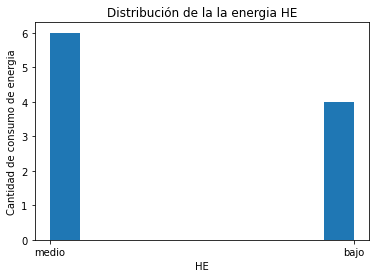

In [66]:
plt.hist(dfTemp2["HE-bins"])                   
plt.xlabel("HE")                                  # Preparamos la data para la grafica de HE
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de la la energia HE")
plt.show()

In [67]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["GEO-bins"] = pd.cut(dfTemp2['GEO'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["GEO", "GEO-bins"]].head()

,GEO,GEO-bins
0,1.575508e+03,alto
1,1.229970e+03,medio
2,-1.229970e+03,bajo
3,-1.087476e+03,bajo
4,2.182787e-13,medio


In [68]:
dfTemp2["GEO-bins"].value_counts()

medio    5
bajo     4
alto     1
Name: GEO-bins, dtype: int64

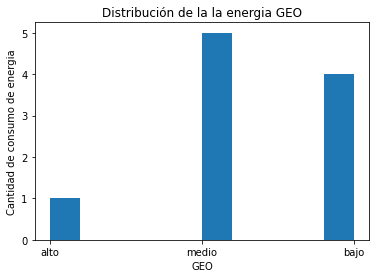

In [69]:
plt.hist(dfTemp2["GEO-bins"])
plt.xlabel("GEO")
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de la la energia GEO")
plt.show()

In [70]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["EOL-bins"] = pd.cut(dfTemp2['EOL'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["EOL", "EOL-bins"]].head()

,EOL,EOL-bins
0,38.736900,medio
1,38.736900,medio
2,-38.736900,medio
3,-6.945804,medio
4,0.000000,medio


In [71]:
dfTemp2["EOL-bins"].value_counts()

medio    10
bajo      0
alto      0
Name: EOL-bins, dtype: int64

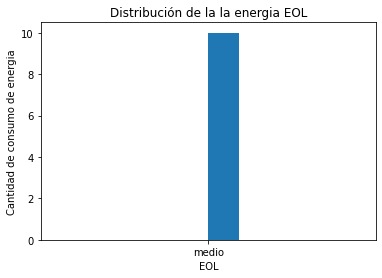

In [72]:
plt.hist(dfTemp2["EOL-bins"])
plt.xlabel("EOL")
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de la la energia EOL")
plt.show()

In [73]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["BIG-bins"] = pd.cut(dfTemp2['BIG'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["BIG", "BIG-bins"]].head()

,BIG,BIG-bins
0,7.818690,medio
1,1.988677,medio
2,-0.034005,medio
3,0.000000,medio
4,0.000000,medio


In [74]:
dfTemp2["BIG-bins"].value_counts()

medio    10
bajo      0
alto      0
Name: BIG-bins, dtype: int64

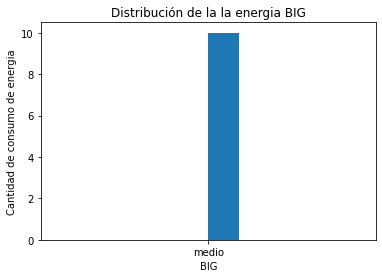

In [75]:
plt.hist(dfTemp2["BIG-bins"])
plt.xlabel("BIG")
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de la la energia BIG")
plt.show()

In [76]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["SOL-bins"] = pd.cut(dfTemp2['SOL'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["SOL", "SOL-bins"]].head()

,SOL,SOL-bins
0,0.028046,medio
1,0.028046,medio
2,-0.028046,medio
3,-0.028046,medio
4,0.000000,medio


In [77]:
dfTemp2["SOL-bins"].value_counts()

medio    10
bajo      0
alto      0
Name: SOL-bins, dtype: int64

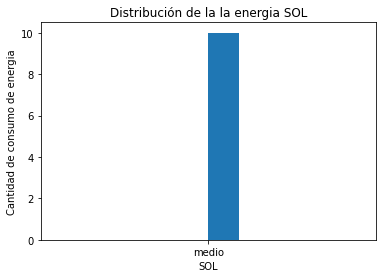

In [78]:
plt.hist(dfTemp2["SOL-bins"])
plt.xlabel("SOL")
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de la la energia SOL")
plt.show()

In [79]:
nombres = ["bajo", "medio", "alto"]
dfTemp2["Total primarias-bins"] = pd.cut(dfTemp2['Total primarias'], bins = cat, labels = nombres, include_lowest=True)
dfTemp2[["Total primarias", "Total primarias-bins"]].head()

,Total primarias,Total primarias-bins
0,3743.784114,alto
1,3700.719666,alto
2,-2797.157538,bajo
3,-1761.354997,bajo
4,-4.181282,medio


In [80]:
dfTemp2["Total primarias-bins"].value_counts()

bajo     4
alto     4
medio    2
Name: Total primarias-bins, dtype: int64

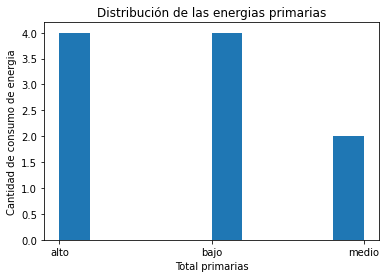

In [81]:
plt.hist(dfTemp2["Total primarias-bins"])
plt.xlabel("Total primarias")
plt.ylabel("Cantidad de consumo de energia")
plt.title("Distribución de las energias primarias")
plt.show()

<h3 Style="color:#8FBC8F">4 Visualizacion de Datos</h3>

Que se hace en esta etapa?

1.Responder las preguntas de Negocio

2.Liberar Conocimiento

3.Generar Informer de negocio


In [82]:
gf1 = dfTemp2.groupby(["HE-bins"]).count()
gf1 = gf1.iloc[:,:1]
gf1

,HE
HE-bins,
bajo,4
medio,6
alto,0


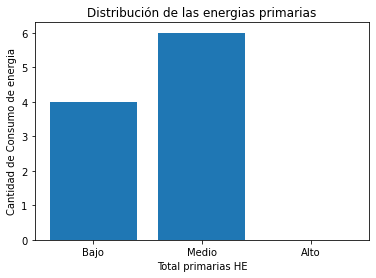

<Figure size 1080x2160 with 0 Axes>

In [83]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["HE"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias HE")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [84]:
gf1 = dfTemp2.groupby(["GEO-bins"]).count()
gf1 = gf1.iloc[:,0:2]
gf1

,HE,GEO
GEO-bins,,
bajo,4,4
medio,5,5
alto,1,1


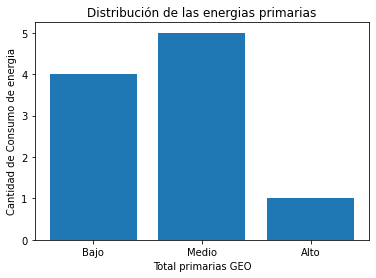

<Figure size 1080x2160 with 0 Axes>

In [85]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["GEO"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias GEO")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [86]:
gf1 = dfTemp2.groupby(["EOL-bins"]).count()
gf1 = gf1.iloc[:,0:3]
gf1

,HE,GEO,EOL
EOL-bins,,,
bajo,0,0,0
medio,10,10,10
alto,0,0,0


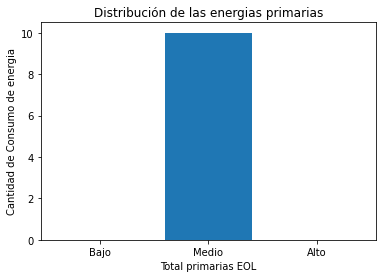

<Figure size 1080x2160 with 0 Axes>

In [87]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["EOL"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias EOL")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [88]:
gf1 = dfTemp2.groupby(["BIG-bins"]).count()
gf1 = gf1.iloc[:,0:4]
gf1

,HE,GEO,EOL,BIG
BIG-bins,,,,
bajo,0,0,0,0
medio,10,10,10,10
alto,0,0,0,0


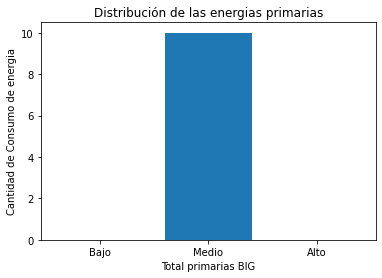

<Figure size 1080x2160 with 0 Axes>

In [89]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["BIG"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias BIG")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [90]:
gf1 = dfTemp2.groupby(["SOL-bins"]).count()
gf1 = gf1.iloc[:,0:5]
gf1

,HE,GEO,EOL,BIG,SOL
SOL-bins,,,,,
bajo,0,0,0,0,0
medio,10,10,10,10,10
alto,0,0,0,0,0


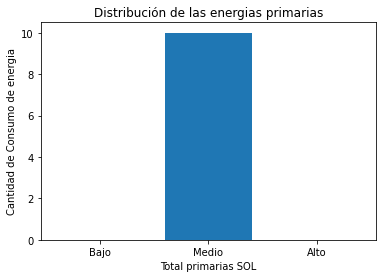

<Figure size 1080x2160 with 0 Axes>

In [91]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["SOL"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias SOL")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [92]:
gf1 = dfTemp2.groupby(["Total primarias-bins"]).count()
gf1 = gf1.iloc[:,0:6]
gf1

,HE,GEO,EOL,BIG,SOL,Total primarias
Total primarias-bins,,,,,,
bajo,4,4,4,4,4,4
medio,2,2,2,2,2,2
alto,4,4,4,4,4,4


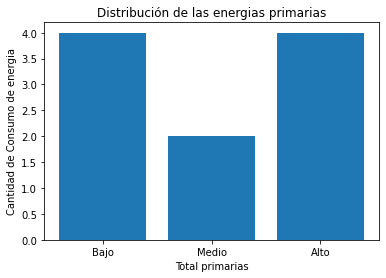

<Figure size 1080x2160 with 0 Axes>

In [93]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["Total primarias"].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de Consumo de energia")

##Leyenda en el eje x
plt.xlabel("Total primarias")

##Titulo del Grafico
plt.title("Distribución de las energias primarias")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [94]:
df_PBNE_energiatemp = df_PBNE_energia

In [95]:
df_PBNE_energiatemp.iloc[:3, :]

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,"152,180.00","150,782.00","154,301.00","156,069.00","157,966.00","164,134.00","173,415.00","176,835.00","176,935.00"
1,Consumo final (no energ.),"3,065.00","1,802.00","2,480.00","2,427.00","2,607.00","3,337.00","4,440.00","5,541.00","5,592.00"
2,Consumo final (energético),"149,115.00","148,979.00","151,821.00","153,642.00","155,359.00","160,797.00","168,975.00","171,294.00","171,342.00"


In [96]:
gf2 = df_PBNE_energiatemp.groupby(["Descripción"]).count()
gf2 = df_PBNE_energiatemp.iloc[0]
#gf2
gf2

Descripción    Consumo final total
2010                   152,180.00 
2011                   150,782.00 
2012                   154,301.00 
2013                   156,069.00 
2014                   157,966.00 
2015                    164,134.00
2016                    173,415.00
2017                    176,835.00
2018                    176,935.00
Name: 0, dtype: object

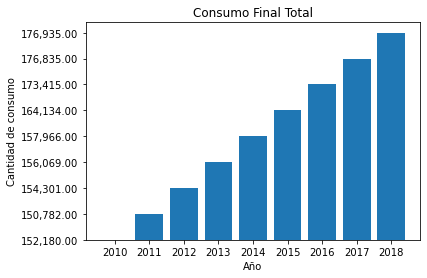

<Figure size 1080x2160 with 0 Axes>

In [97]:
eje_x = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
eje_y = ["152,180.00", "150,782.00", "154,301.00", "156,069.00", "157,966.00", "164,134.00", "173,415.00", "176,835.00", "176,935.00"]


##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel("Cantidad de consumo")

##Leyenda en el eje x
plt.xlabel("Año")

##Titulo del Grafico
plt.title("Consumo Final Total")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

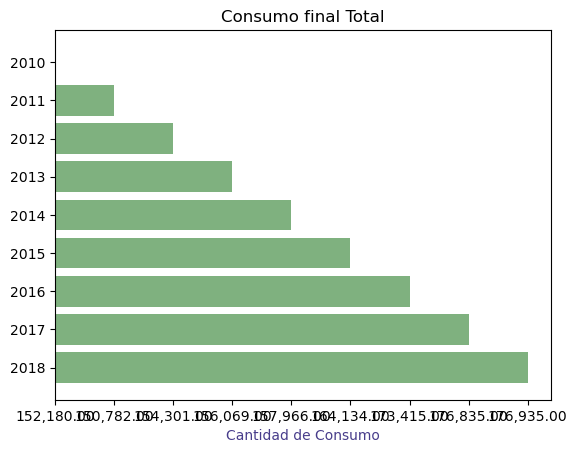

In [98]:
eje_x = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
eje_y = ["152,180.00", "150,782.00", "154,301.00", "156,069.00", "157,966.00", "164,134.00", "173,415.00", "176,835.00", "176,935.00"]

plt.rcdefaults()
fig, ax = plt.subplots()

# Este se alimenta de la lista denominada eje_x
y_pos = np.arange(len(eje_x))

ax.barh(y_pos, eje_y, align="center", color= "#006400", alpha=0.5)

ax.set_yticks(y_pos, labels=eje_x, color = "black")
ax.invert_yaxis() #labels read top-top-botttom"
ax.set_xlabel("Cantidad de Consumo").set_color("#483D8B")
ax.set_title("Consumo final Total")

plt.show()

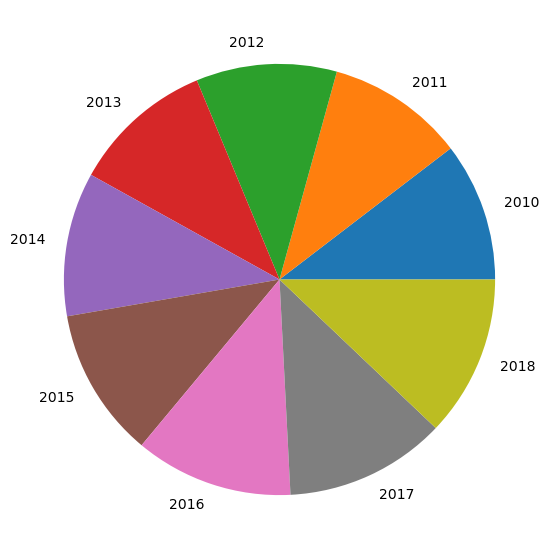

In [99]:
from matplotlib import pyplot as plt 
import numpy as np 
  
  
año = ['2010', '2011', '2012', 
        '2013', '2014', '2015', '2016', '2017', '2018'] 
  
data = [152.180, 150.782, 154.301, 156.069, 157.966, 164.134, 173.415, 176.835, 176.935] 
  
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = año) 
  
plt.show()

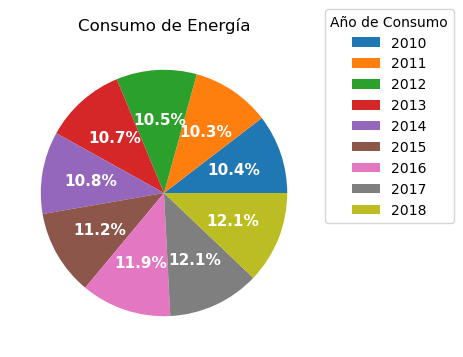

In [119]:
fig, ax = plt.subplots(figsize=(8,4), subplot_kw=dict(aspect="equal"))
año = ['2010', '2011', '2012', 
        '2013', '2014', '2015', '2016', '2017', '2018']
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, año,
          title="Año de Consumo",
          loc="center left",
          bbox_to_anchor=(1, 0, 1.5, 1.5))
plt.setp(autotexts, size=11, weight="bold")
ax.set_title("Consumo de Energía")
plt.show()


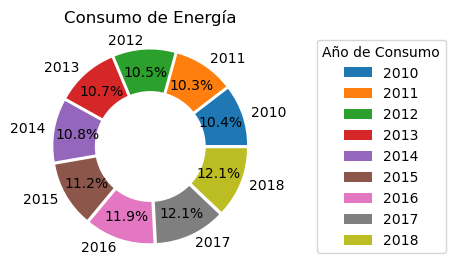

In [118]:
fig, ax = plt.subplots(figsize=(8,3), subplot_kw=dict(aspect="equal"))
año = ['2010', '2011', '2012', 
        '2013', '2014', '2015', '2016', '2017', '2018']


# Colores
colors = ['#FCF4D9', '#8ED2C9', '#00AAA0', 
          '#FF7A5A', '#FFB85F', '#ADFF2F', '#AFEEEE', '#6495ED', '#7FFFD4'] 
# Separaciones
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Creacion de grafica circular
plt.pie(data, labels=año,
        autopct='%1.1f%%', pctdistance=0.75,
        explode=explode)

# dibujo de circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Esta linea agrega el cirulo blanco sobre la grafica
fig.gca().add_artist(centre_circle)

plt.title('Distribucion de autos segun estilo')

ax.legend(wedges, año,
          title="Año de Consumo",
          loc="center",
          bbox_to_anchor=(1, 0, 1, 1))

plt.setp(autotexts, size=11, weight="bold")
ax.set_title("Consumo de Energía")
plt.show()

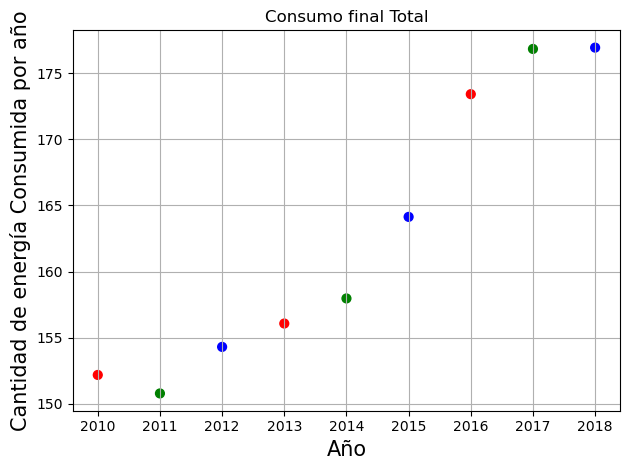

In [159]:
import matplotlib.cbook as cbook

import matplotlib.pyplot as plt 
import numpy 

fig, ax = plt.subplots()

a = numpy.array([[2010, 2011, 2012, 
        2013, 2014, 2015, 2016, 2017, 2018], 
                 [152.180, 150.782, 154.301, 156.069, 157.966, 164.134, 173.415, 176.835, 176.935]]) 

categories = numpy.array([0, 1, 2, 0, 1, 2, 0, 1, 2]) 
  
colormap = numpy.array(['r', 'g', 'b', 'c', 'm', 't', 'q', 'l', 'p'])

plt.scatter(a[0], a[1], s=40, c=colormap[categories]) 

ax.set_xlabel("Año", fontsize=15)
ax.set_ylabel("Cantidad de energía Consumida por año", fontsize=15)
ax.set_title("Consumo final Total")
           
ax.grid(True)
fig.tight_layout()

plt.show()